# **Case Introduction**
You are asked to classify facial images using the Labeled Face in Wild (LFW) dataset, here are the details:
## **Objective Spesification**
1. Each label from the LFW dataset must contain a minimum of 10 images (5 points)
2. The image used is an RGB / color image (5 points) 
3. (Optional) Perform data pre-processing if necessary (extra 10 points) 
4. (Required) Use the histogram feature for each image channel (35 points) 
5.  (Required) Use SVM algorithm as the base model (35 points) 
6. (Required) Use accuracy metrics, and *classification report* to see model performance (20 points)

## **Chalenges**
After completing the objective based on the mandatory specifications, you are allowed to:
1. Using other features besides the histogram (extra 20 points)
2. Using other models than SVM (extra 10 points) 
3. Evaluate with other metrics or report with *confusion matrix* (extra 10 points)    

# **Preparation**

In [18]:
# Load and import the necessary libraries
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_lfw_people
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score

# **Load Data**

## **Images LFW Data Loading**

In [19]:
# Load the dataset
# we will want to keep images in color; color=True
# use 150 people to make the data more manageable
faces = fetch_lfw_people(min_faces_per_person=150, color=True)
# check faces
print(f'Total Label: {len(faces.target_names)}')
print(f'Data dimension: {faces.images.shape}')
print(f'Total images: {len(faces.images)}')
print(f'Images flatten dimension: {faces.data.shape}')

Total Label: 2
Data dimension: (766, 62, 47, 3)
Total images: 766
Images flatten dimension: (766, 8742)


## **Show 15 Random Images**

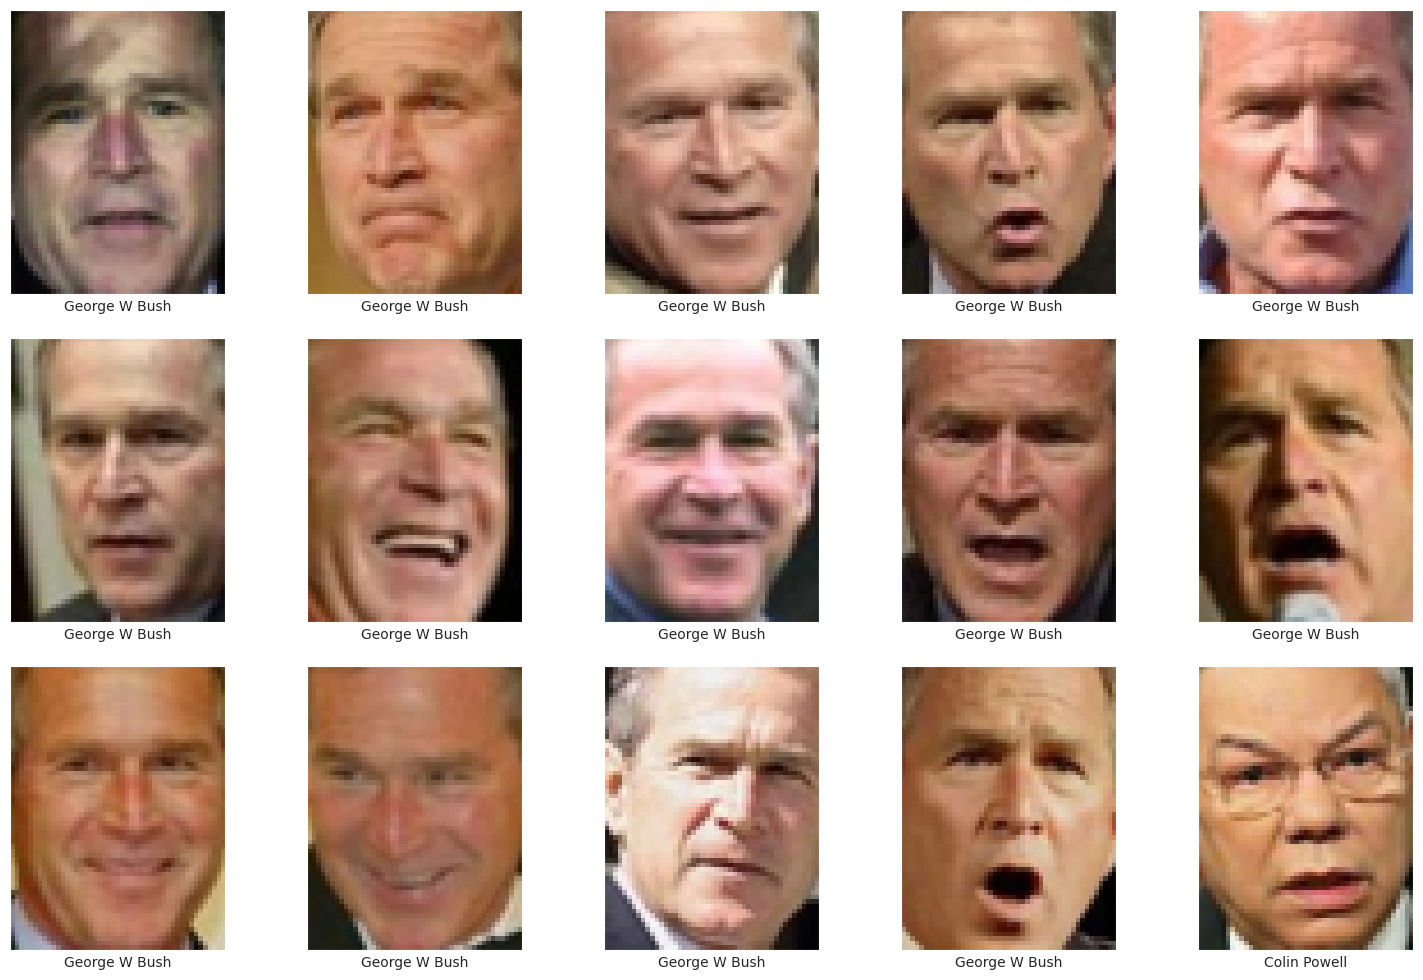

In [20]:
# # check by Plotting the images
# # Show 15 random images
rand_labels = [np.random.randint(0, len(faces.images)) for x in range(15)]
fig, axes = plt.subplots(3, 5, figsize=(15, 10))
fig.tight_layout()
for i, axi in enumerate(axes.flat):
    axi.imshow(faces.images[rand_labels[i]], cmap='bone')
    axi.set(xticks=[], yticks=[],
            xlabel=faces.target_names[faces.target[rand_labels[i]]])

# **Data Preprocessing**
In this section you are allowed to carry out data pre-processing according to your needs.  Pre-processing of data can be: 
1. Standardization of feature values or labels 
2. Image size adjustment
3. Image colorspace changes 
4. etc. 

## **Convert Images to HSV color format**

## Converting Images to HSV Format for Histogram Extraction

In the process of extracting histograms from images, converting the images from BGR (Blue, Green, Red) format to HSV (Hue, Saturation, Value) format is an important step. 

Below is an explanation of why this conversion is beneficial for histogram extraction:

### Why Convert to HSV Format?

1. **Color Representation**:
   - HSV separates color information (hue) from intensity (value), making it easier to analyze colors independently of lighting conditions. This is particularly useful in image processing tasks that require color recognition.

2. **Robustness to Lighting Variations**:
   - The HSV format is less sensitive to variations in lighting compared to the RGB format. By focusing on hue and saturation, the histogram can provide more reliable features that are not affected by brightness changes.

3. **Improved Feature Extraction**:
   - Extracting histograms from the HSV channels allows for a better understanding of color distributions. For instance, hue captures the type of color, saturation indicates the vibrancy, and value reflects brightness, which can be crucial for distinguishing between similar colors.

4. **Enhanced Machine Learning Performance**:
   - Many machine learning algorithms perform better with features that are invariant to lighting changes. Using HSV histograms can lead to improved model accuracy in tasks like classification and segmentation.

In [21]:
faces_hsv = []
for img in faces.images:
    img_color = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    faces_hsv.append(img_color)
faces.images = np.array(faces_hsv)

# **Feature Extraction**
In this section, carry out the requested feature extraction process, namely the histogram of each channel of the image.

There are many ways to extract histogram features, here are Hints:
1. One way to extract histogram features is to use the `np.histogram` function.

Here the breakdown of your histogram calculation function using an image of size 62x47 and a grid parameter of 5x5. 

This explanation will help you understand how dividing the image into grids and calculating histograms for each part works, using an analogy.

## **Step-by-Step Explanation**

1. image Size
- The input image has dimensions **62x47** (height = 62 pixels, width = 47 pixels).
- The function divides this image into a **5x5 grid**, splitting the image into 5 rows and 5 columns of smaller regions.

### Grid Size Calculation
- The height of each grid cell is computed as:
  $$
  \text{grid\_h} = \frac{62}{5} = 12 \text{ pixels}
  $$

- The width of each grid cell is computed as:
  $$
  \text{grid\_w} = \frac{47}{5} = 9 \text{ pixels}
  $$

Thus, each grid cell will be a sub-image of size **12x9 pixels** (except the last row/column, which may be slightly different due to integer division).

### Grid Division (Analogous to Tiles in an Image)
Imagine splitting your **62x47 image** into **25 small tiles**, where each tile is **12x9 pixels**. This process is analogous to breaking a picture into smaller pieces to analyze the color patterns in each piece separately.

### Histogram Calculation for Each Tile
For each tile (sub-image), the function calculates the color histogram for each of the three color channels in **HSV** (Hue, Saturation, and Value):
- A histogram for a channel is a count of how many pixels fall into certain ranges of intensity (0 to 180 in Hue, 0 to 255 in Saturation and Value).
- For example, one tile might have many pixels with low hue values (0-50) and fewer with high hue values (100-180).
- Each histogram contains **256 bins**, capturing the pixel intensity distribution for each channel within that tile.

### Resulting Feature Vector
After calculating the histogram for the Hue, Saturation, and Value channels in each grid (tile), the function appends these histograms to a list. Since there are **25 grids** and each grid has **3 histograms** (one for each HSV channel), you end up with a feature vector that contains the histograms of all the grids.

### Flattening the Histograms
Finally, the histograms are flattened into a **1D feature vector** for easier use in machine learning models. Instead of having separate histograms for each grid, the function combines them into one long array (flattening), which represents the color distribution across all tiles of the image.

This process provides a more detailed and spatial understanding of color distribution by breaking down the image into grids and analyzing the color intensity distribution within each one. It is more informative than a simple, global histogram for the whole image, as it captures local color variations.

## **Conclusion**

When extracting histograms for feature extraction in your function, the following goals are typically pursued:

1. **Capture Color Distribution**:
   - Histograms provide a detailed representation of color distribution across the image. This helps in understanding the overall color composition and variations within different regions (tiles).

2. **Local Analysis**:
   - By dividing the image into grids (tiles), you can analyze local color variations. This is crucial for applications where spatial context matters, such as object detection or scene understanding.

3. **Dimensionality Reduction**:
   - Instead of using raw pixel values, histograms summarize color information into fixed-size feature vectors. This reduces the dimensionality of the data, making it more manageable for machine learning models.

4. **Robustness to Noise**:
   - Histograms can be more robust to noise and variations in lighting conditions. They focus on the distribution of pixel intensities rather than individual pixel values, which can help improve model performance.

5. **Facilitate Comparisons**:
   - Extracted histograms can be used to compare different images or regions. This is useful in tasks like image retrieval, classification, and clustering, where understanding similarity between images is essential.

6. **Enhance Model Training**:
   - By providing a rich set of features that encapsulate color information, histograms can enhance the training of machine learning models, helping them learn better representations for tasks like classification or segmentation.

7. **Support Multi-Channel Analysis**:
   - By extracting histograms for multiple color channels (like HSV), you gain insights into different aspects of color, such as hue, saturation, and brightness, which can be important for distinguishing between similar objects.

Overall, extracting histograms as features serves to enhance the representation of the image data, making it more suitable for various analytical tasks in computer vision and machine learning.

In [22]:
# create function to extract histogram from each channel
# This function takes an image and divides it into smaller grid sections.
# The size of the grid can be specified by the grid_size parameter. 
# By default, it divides the image into a 4x4 grid.
# Grid Size: The choice of grid size affects the dimensionality of the resulting feature vector
# For example, a 4x4 grid produces 16 cells, each with 3 histograms (one per channel),
# leading to a 48-dimensional feature vector, this from 4x4x3 = 48
def extract_histogram(image, grid_size=(4, 4)):
    # Create a list to store the histogram
    hist = []
    # Get the image size: height and width
    # '_' means we don't need the value for channel
    h, w, _ = image.shape
    # Calculate the grid size
    # grid_h is the height of each grid
    # grid_w is the width of each grid
    # h and w are the height and width of the image
    # // is the floor division, means we want the result to be an integer
    # so the result will be rounded down
    # for example 5 // 2 = 2
    grid_h, grid_w = h // grid_size[0], w // grid_size[1]
    
    # Loop through each grid
    for row in range(grid_size[0]):
        for col in range(grid_size[1]):
            # Get the sub-image with:
            # row * grid_h is the starting height index of the grid cell 
            # (row + 1) * grid_h is the ending height index of the grid cell
            # col * grid_w is the starting width index of the grid cell
            # (col + 1) * grid_w is the ending width index of the grid cell
            # For example, if grid_size is (5, 5) and image dimension is (62, 47) will result in:
                # grid_h = 62 // 5 = 12
                # grid_w = 47 // 5 = 9
                # for row = 0, col = 0
                    # row * grid_h = 0, (row + 1) * grid_h = 12
                    # col * grid_w = 0, (col + 1) * grid_w = 9
                    # sub_image = image[0:12, 0:9]
                # for row = 0, col = 1
                    # row * grid_h = 0, (row + 1) * grid_h = 12
                    # col * grid_w = 9, (col + 1) * grid_w = 18
                    # sub_image = image[0:12, 9:18]
                # and so on
            sub_image = image[row * grid_h : (row + 1) * grid_h, col * grid_w : (col + 1) * grid_w]
            # Calculate the histogram for each channel in the sub-image and append it to the hist list
            # The histogram function returns a tuple of two values (histogram, bin_edges)
            # We only need the histogram, so we use [0] to get the histogram
            # We use bins=256 to get the histogram for each pixel value (0-255)
            # We use range=(0, 1) to normalize the pixel values to the range 0-1
            for i in range(3):
                hist.append(np.histogram(sub_image[:, :, i], bins=256, range=(0, 1))[0])
    # Flatten the histogram to create the feature vector 
    # For example, if hist is [[1, 2, 3], [4, 5, 6]], then np.array(hist).flatten() will be [1, 2, 3, 4, 5, 6]
    return np.array(hist).flatten()

# extract histogram from each image in the dataset
# here detail explanation:
# faces.images is an array of images
# for each image in faces.images, extract_histogram function is called
# the result is stored in X
# X is a 2D array where each row represents the histogram of an image
# the shape of X will be (number of images, length of the feature vector)
# the length of the feature vector is determined by the grid size and the number of channels
# in this case, the grid size is (5, 5) and the number of channels is 3 (HSV)
# so the length of the feature vector will be 5 * 5 * 3 = 75
X = np.array([extract_histogram(image,grid_size=(5,5)) for image in faces.images])


# **Model Building**
In this section, carry out the model creation process: 
1. Creation of training data and testing data 
2. create object model
3. fiting model

Here explanation code for the model building process:
1. Split the data into training and testing sets using `train_test_split`.
2. Standardize the features using `StandardScaler`, why we need to standardize the features? because the SVM algorithm is sensitive to the feature scaling.
3. Create the model using `SVC` and set the parameters, here breakdown of the parameters:
    - `C` is the regularization parameter, it controls the trade-off between having a smooth decision boundary and classifying the training points correctly.
    - `gamma` is the kernel coefficient, it defines how far the influence of a single training example reaches.
    - `kernel` is the kernel type, it specifies the type of hyperplane used to separate the data.
    - `class_weight` is the weight associated with classes, it is used to handle class imbalance.
    
    note: for class_weight, we set it to 'balanced' to handle the class imbalance, this will adjust the weights inversely proportional to class frequencies
4. Fit the model using the training data.

note: why we use `StandardScaler`? because the SVM algorithm is sensitive to the feature scaling, so we need to standardize the features.
in this case, we use `StandardScaler` to standardize the features, the `StandardScaler` will standardize features by removing the mean and scaling to unit variance.
in images classification, we use `StandardScaler` to standardize the histogram features, so the SVM model can learn the features better.
because the histogram features are pixel intensity values, which can vary widely, so we need to standardize them. why pick `StandardScaler` not other scalers? because `StandardScaler` are more robust to outliers.

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, faces.target, test_size=0.2, random_state=100)

X_scaler = StandardScaler()

X_train = X_scaler.fit_transform(X_train)
X_test = X_scaler.transform(X_test)

model = SVC(C=0.0001,gamma=0.00001,kernel="linear", class_weight='balanced')

model.fit(X_train, y_train)

SVC(C=0.0001, class_weight='balanced', gamma=1e-05, kernel='linear')

# **Evaluation**
In this section, evaluate the training data and testing data by using accuracy metrics and also classfication reports, here are the hints:
1. you can take a look in practicum 4 and 5

## **Train and Test Accuracy Metrics**

In [24]:
# Predict on the test set
y_pred = model.predict(X_test)

# Predict on the training data
y_train_pred = model.predict(X_train)

# Now calculate the accuracy on the training data
train_accuracy = accuracy_score(y_train, y_train_pred)

# Calculate accuracy on test set (unchanged)
test_accuracy = accuracy_score(y_test, y_pred)

scores = cross_val_score(model, X_train, y_train, cv=5)

# Calculate mean and standard deviation
mean_score = np.mean(scores)
std_dev = np.std(scores)

print(f'Mean Cross-Validation Score: {mean_score:.4f}')
print(f'Standard Deviation: {std_dev:.4f}')

# Interpretation
print('Interpretation:')
if std_dev > 0.1:
    print("The model's performance is inconsistent across folds.")
elif mean_score < 0.7:
    print("The model is performing poorly.")
else:
    print("The model appears to generalize well.")


print(f"\nAccuracy on train set: {train_accuracy * 100:.2f}%")
print(f"Accuracy on test set: {test_accuracy * 100:.2f}%")

Mean Cross-Validation Score: 0.8954
Standard Deviation: 0.0277
Interpretation:
The model appears to generalize well.

Accuracy on train set: 100.00%
Accuracy on test set: 90.26%


### **Classification Report on Training set**

In [25]:
# calculate accuracy in the training set
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f"Model Accuration in Training Set: {train_accuracy * 100:.2f}%")
# Classification report and confusion matrix in the training set
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=faces.target_names))

Model Accuration in Training Set: 100.00%
Classification Report:
               precision    recall  f1-score   support

 Colin Powell       0.90      0.78      0.84        49
George W Bush       0.90      0.96      0.93       105

     accuracy                           0.90       154
    macro avg       0.90      0.87      0.88       154
 weighted avg       0.90      0.90      0.90       154



### **Classification Report on Test set**

In [26]:
# Calculate accuracy in the test set
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuration in Testing Set: {accuracy * 100:.2f}%")
# Classification report and confusion matrix in the test set
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=faces.target_names))

Model Accuration in Testing Set: 90.26%
Classification Report:
               precision    recall  f1-score   support

 Colin Powell       0.90      0.78      0.84        49
George W Bush       0.90      0.96      0.93       105

     accuracy                           0.90       154
    macro avg       0.90      0.87      0.88       154
 weighted avg       0.90      0.90      0.90       154



### **Confusion Matrix**

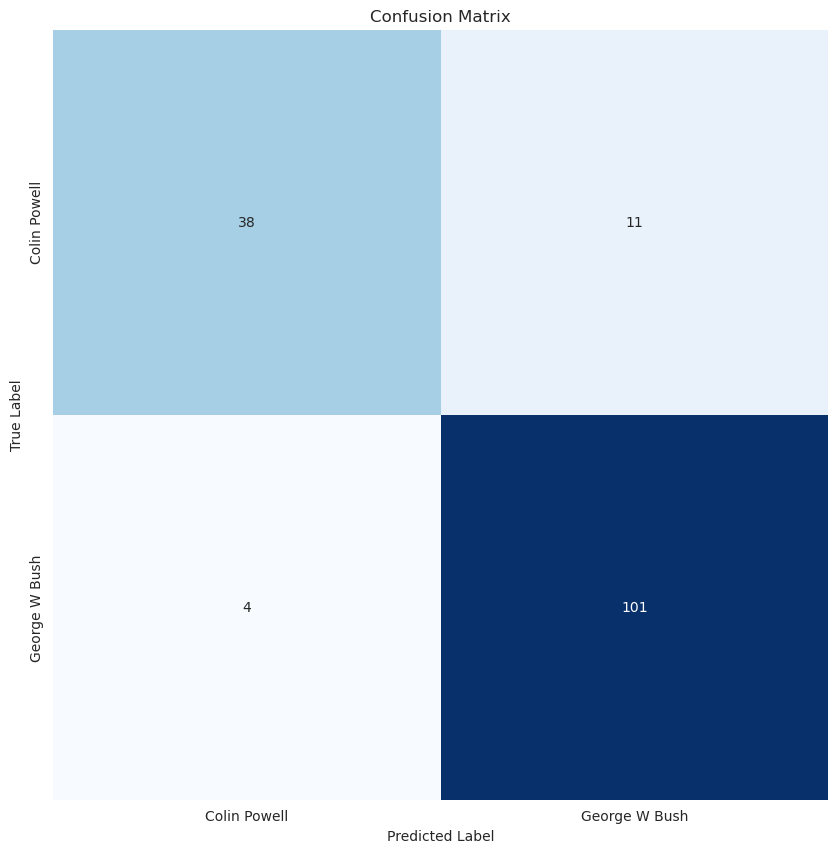

In [27]:
conf_matrix = confusion_matrix(y_test, y_pred)
# Plot Confusion Matrix
plt.figure(figsize=(10,10))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=faces.target_names,
            yticklabels=faces.target_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# **Chalenge**

## **Load Data**

In [28]:
# Fetch LFW people dataset with color images
# set min_faces_per_person to 90 to make the model perform better
# resize the image to 0.4 for faster processing
faces_challenge = fetch_lfw_people(min_faces_per_person=90, resize=0.4, color=True)

# check faces
print(f'Total Label: {len(faces_challenge.target_names)}')
print(f'Data dimension: {faces_challenge.images.shape}')
print(f'Total images: {len(faces_challenge.images)}')
print(f'Images flatten dimension: {faces_challenge.data.shape}')


Total Label: 5
Data dimension: (1140, 50, 37, 3)
Total images: 1140
Images flatten dimension: (1140, 5550)


## **Feature Extraction**

In [29]:
from skimage.feature import hog

X = faces_challenge.images  
y = faces_challenge.target

def extract_hog_features(images):
    hog_features = []
    for image in images:
        # Check if the image is colored (3 channels)
        if image.ndim == 3 and image.shape[2] == 3:
            # Extract HOG features for each channel and concatenate them
            hog_channels = []
            for i in range(3):  # Loop over RGB channels
                channel_hog = hog(image[:, :, i], pixels_per_cell=(8, 8),
                                  cells_per_block=(2, 2), visualize=False)
                hog_channels.append(channel_hog)
            # Concatenate HOG features from all channels
            hog_feature = np.concatenate(hog_channels)
        else:
            # If image is grayscale, just compute HOG normally
            hog_feature = hog(image, pixels_per_cell=(8, 8),
                              cells_per_block=(2, 2), visualize=False)

        hog_features.append(hog_feature)

    return np.array(hog_features)

# Extract HOG features for colored images
X_hog = extract_hog_features(X)

## **Model Building**

In [30]:
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
# from sklearn.model_selection import GridSearchCV

X_train, X_test, y_train, y_test = train_test_split(X_hog, y, test_size=0.2, random_state=42)


model_pipeline = Pipeline([
    ('pca', PCA(n_components=150)),
    ('svc', SVC(kernel='rbf', C=100, gamma=0.1))
])

model_pipeline.fit(X_train, y_train)

Pipeline(steps=[('pca', PCA(n_components=150)), ('svc', SVC(C=100, gamma=0.1))])

## **Train and Test Accuracy Metrics**

In [31]:
# Predict on the test set
y_test_pred_hog = model_pipeline.predict(X_test)

# Predict on the training data
y_train_pred_hog = model_pipeline.predict(X_train)

# Now calculate the accuracy on the training data
acc_train = accuracy_score(y_train, y_train_pred_hog)

# Calculate accuracy on the Testing data
acc_test = accuracy_score(y_test, y_test_pred_hog)

scores = cross_val_score(model_pipeline, X_train, y_train, cv=5)

# Calculate mean and standard deviation
mean_score = np.mean(scores)
std_dev = np.std(scores)

print(f'Mean Cross-Validation Score: {mean_score:.4f}')
print(f'Standard Deviation: {std_dev:.4f}')

# Interpretation
print('Interpretation:')
if std_dev > 0.1:
    print("The model's performance is inconsistent across folds.")
elif mean_score < 0.7:
    print("The model is performing poorly.")
else:
    print("The model appears to generalize well.")


print(f"\nAccuracy on train set: {acc_train * 100:.2f}%")
print(f"Accuracy on test set: {acc_test * 100:.2f}%")

Mean Cross-Validation Score: 0.9145
Standard Deviation: 0.0226
Interpretation:
The model appears to generalize well.

Accuracy on train set: 100.00%
Accuracy on test set: 97.37%


### **Classification Report on Training set**

In [32]:
# calculate accuracy in the training set
print(f"Model Accuration in Training Set: {acc_train * 100:.2f}%")
# Classification report and confusion matrix in the training set
print("Classification Report:")
print(classification_report(y_train, y_train_pred_hog, target_names=faces_challenge.target_names))

Model Accuration in Training Set: 100.00%
Classification Report:
                   precision    recall  f1-score   support

     Colin Powell       1.00      1.00      1.00       186
  Donald Rumsfeld       1.00      1.00      1.00        96
    George W Bush       1.00      1.00      1.00       424
Gerhard Schroeder       1.00      1.00      1.00        87
       Tony Blair       1.00      1.00      1.00       119

         accuracy                           1.00       912
        macro avg       1.00      1.00      1.00       912
     weighted avg       1.00      1.00      1.00       912



## **Classification Report on Test set**

In [33]:
# calculate accuracy in the training set
acc_test = accuracy_score(y_test, y_test_pred_hog)
print(f"Model Accuration in Training Set: {acc_test * 100:.2f}%")
# Classification report and confusion matrix in the training set
print("Classification Report:")
print(classification_report(y_test, y_test_pred_hog, target_names=faces_challenge.target_names))

Model Accuration in Training Set: 97.37%
Classification Report:
                   precision    recall  f1-score   support

     Colin Powell       0.98      1.00      0.99        50
  Donald Rumsfeld       0.92      0.96      0.94        25
    George W Bush       0.98      1.00      0.99       106
Gerhard Schroeder       1.00      0.86      0.93        22
       Tony Blair       0.96      0.92      0.94        25

         accuracy                           0.97       228
        macro avg       0.97      0.95      0.96       228
     weighted avg       0.97      0.97      0.97       228



## **Confusion Matrix**

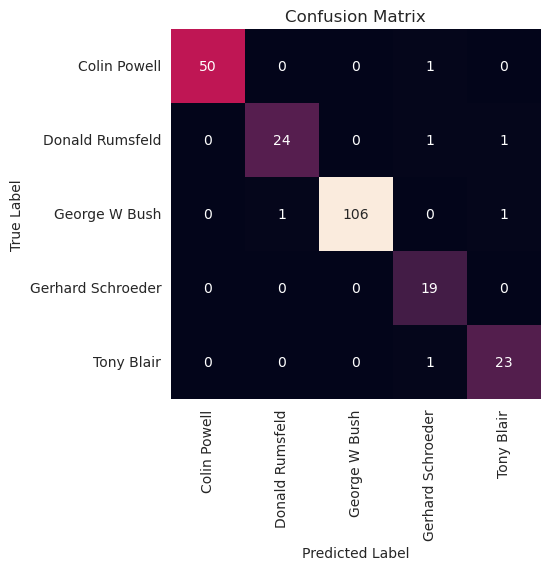

In [34]:
from sklearn.metrics import confusion_matrix

mat = confusion_matrix(y_test, y_test_pred_hog)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=faces_challenge.target_names,
            yticklabels=faces_challenge.target_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()